In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Temporal SIR model

In [62]:
def SIR_temporal_simulate(params):
    
    def forward_euler(current, beta, gamma):
        '''Implement simple forward Euler ODE solving.'''

        S_current, I_current, R_current = current
        S_next = S_current - beta*S_current*I_current
        I_next = I_current + beta*S_current*I_current - gamma*I_current
        R_next = R_current + gamma*I_current

        return [S_next, I_next, R_next]
    
    #Time to simulate for, transmission rate, recovery rate
    Tmax, beta, gamma = params['Tmax'], params['beta'], params['gamma']
    #Create solution array
    solution = np.empty((Tmax+1, 3))
    #Initialise for t=0
    solution[0] = [params['S_init'], params['I_init'], params['R_init']]

    for t in range(Tmax):
        solution[t+1] = forward_euler(solution[t], beta, gamma)
        
    plt.figure(figsize=(8,5))
    plt.plot(solution[:, 0], label='S')
    plt.plot(solution[:, 1], label='I')
    plt.plot(solution[:, 2], label='R')
    plt.legend()
    plt.title(f'Simulation for {Tmax} timesteps\nbeta={beta}, gamma={gamma}, init={solution[0]}')
    plt.xlabel('Time')
    plt.show()

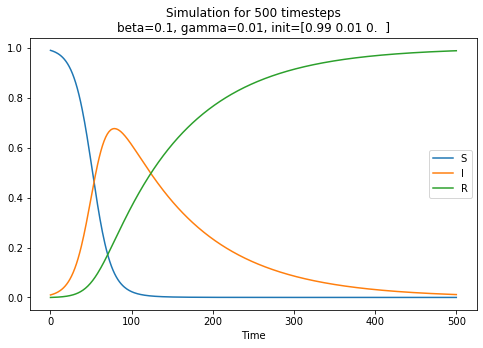

In [63]:
params={
    'beta':0.1,
    'gamma':0.01,
    'S_init':0.99,
    'I_init':0.01,
    'R_init':0.0,
    'Tmax':500
}

SIR_temporal_simulate(params)

### Spatio-temporal SIR model

In [3]:
def SIR_spatio_temporal_simulate(params):
    
    def forward_euler_spatial(current, beta, gamma, dS, dI, dR, Xmax, Ymax):
        '''Implement simple forward Euler ODE solving
        with spatial diffusion terms.'''

        S_current, I_current, R_current = current
        
        S_next = S_current.copy()
        I_next = I_current.copy()
        R_next = R_current.copy()
        

        for i in range(1, Xmax-1):
            for j in range(1, Ymax-1):
                S_next[i,j] = S_current[i,j] - beta*S_current[i,j]*I_current[i,j] + \
                    dS * (S_current[i+1, j] + S_current[i-1, j] - 4*S_current[i, j] + S_current[i, j+1] + S_current[i, j-1])
                I_next[i,j] = I_current[i,j] + beta*S_current[i,j]*I_current[i,j] - gamma*I_current[i,j] + \
                    dI * (I_current[i+1, j] + I_current[i-1, j] - 4*I_current[i, j] + I_current[i, j+1] + I_current[i, j-1])
                R_next[i,j] = R_current[i,j] + gamma*I_current[i,j] + \
                    dR * (R_current[i+1, j] + R_current[i-1, j] - 4*R_current[i, j] + R_current[i, j+1] + R_current[i, j-1])

        return [S_next, I_next, R_next]
    
    #Time to simulate for, transmission rate, recovery rate
    Tmax, Xmax, Ymax = params['Tmax'], params['Xmax'], params['Ymax']
    beta, gamma, dS, dI, dR = params['beta'], params['gamma'], params['dS'], params['dI'], params['dR']
    #Create solution array
    solution = np.empty((Tmax+1, 3, Xmax, Ymax))
    #Initialise for t=0
    solution[0] = np.array([params['S_init'], params['I_init'], params['R_init']])

    for t in range(Tmax):
        solution[t+1] = forward_euler_spatial(solution[t], beta, gamma, dS, dI, dR, Xmax, Ymax)
        
#     plt.figure(figsize=(8,5))
#     plt.plot(solution[:, 0], label='S')
#     plt.plot(solution[:, 1], label='I')
#     plt.plot(solution[:, 2], label='R')
#     plt.legend()
#     plt.title(f'Simulation for {Tmax} timesteps\nbeta={beta}, gamma={gamma}, init={solution[0]}')
#     plt.xlabel('Time')
#     plt.show()

    return solution

In [51]:
I_init = np.zeros((20,20))
I_init[2:4, 2:4] = 0.01
S_init = 1-I_init
params={
    'beta':2.0,
    'gamma':0.01,
    'S_init':S_init,
    'I_init':I_init,
    'R_init':np.zeros((20,20)),
    'Tmax':20,
    'Xmax':20,
    'Ymax':20,
    'dS':0.0,
    'dI':0.5,
    'dR':0.0
}

solution = SIR_spatio_temporal_simulate(params)

In [52]:
solution.shape

(21, 3, 20, 20)

In [55]:
solution[10, 1, :, :]

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -4.36879648e-02,  2.36345778e-01,
         3.80936690e-01, -2.35692770e-01,  1.10264126e+00,
        -3.90238871e-01,  8.66024497e-01,  7.63776817e-01,
         1.83365417e-01,  2.59351132e-02,  2.27382812e-03,
         9.76562500e-05,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  2.36345778e-01,  3.08300119e-01,
         3.74949626e-01,  7.09225775e-01,  2.06985496e-01,
         9.29214300e-01,  5.90386203e-01,  1.05868450e+00,
         3.00808272e-01,  4.6

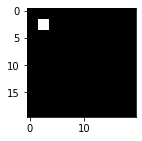

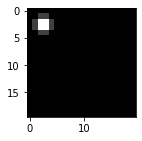

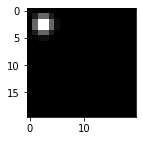

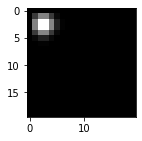

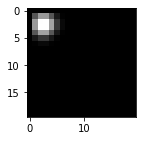

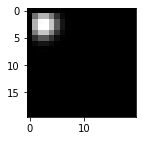

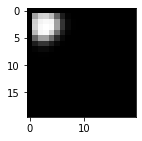

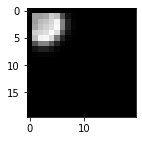

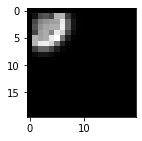

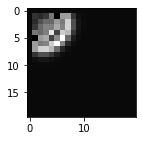

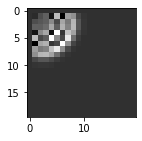

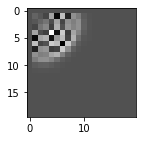

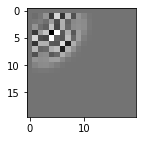

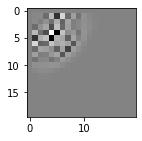

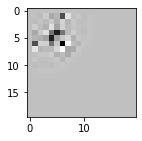

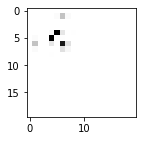

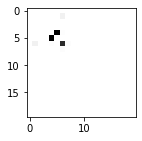

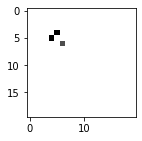

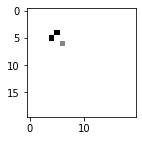

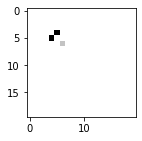

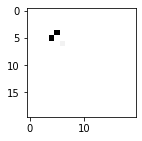

In [57]:
for i in range(solution.shape[0]):
    plt.figure(i, figsize=(2,2))
#     fig,ax = plt.subplots(1, 3, figsize=(6, 2))
#     ax[0].imshow(solution[i, 0], cmap="gray")
#     ax[0].set_title('S')
#     ax[1].imshow(solution[i, 1], cmap="gray")
#     ax[1].set_title('I')
#     ax[2].imshow(solution[i, 2], cmap="gray")
#     ax[2].set_title('R')
    plt.imshow(solution[i,1], cmap='gray')
    plt.show()
    plt.close()

### Agent based model

In [221]:
def random_walk(current, sigma):
    '''Simulate one time step of random walk.'''
    new = current + sigma*np.random.randn(current.shape[0], current.shape[1])
    new[new > 1]=1
    new[new < 0]=0
    return new

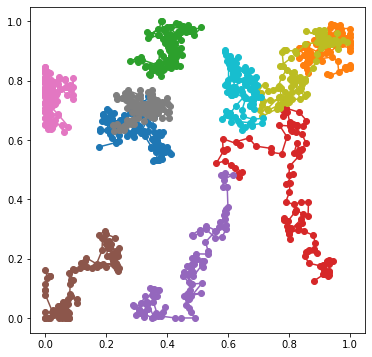

In [227]:
n_people = 10
Tmax = 100
coords = np.expand_dims(np.random.rand(n_people,2), axis=0)
for i in range(Tmax):
    new = np.expand_dims(random_walk(coords[i], 0.02), axis=0)
    coords = np.concatenate((coords, new), axis=0)
plt.figure(figsize=(6,6))
for i in range(n_people):
    plt.plot(coords[:, i, 0], coords[:, i, 1], '-o')

In [233]:
plt.scatter(co)

1

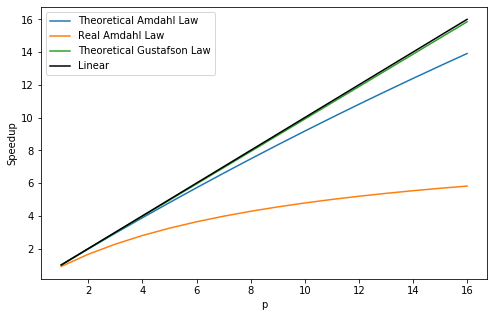

In [28]:
p = np.linspace(1,16,16)
S_am = 1/(0.01 + 0.99/p )
S_am_real = 1/(0.01 + 0.99/p +0.1)
S_gu = 1-0.99+0.99*p
plt.figure(figsize=(8,5))
plt.plot(p, S_am, label="Theoretical Amdahl Law")
plt.plot(p, S_am_real, label="Real Amdahl Law")
plt.plot(p, S_gu, label="Theoretical Gustafson Law")
plt.plot(p, p, 'k',label='Linear')
plt.legend()
plt.xlabel('p')
plt.ylabel('Speedup')
plt.savefig('scaling.png')

In [2]:
data = np.load("/Users/sujay/Downloads/matrix.npy")

In [3]:
data.shape

(1792, 2944, 6)

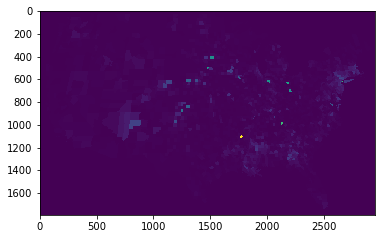

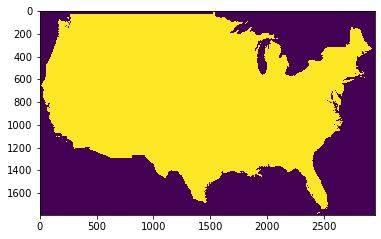

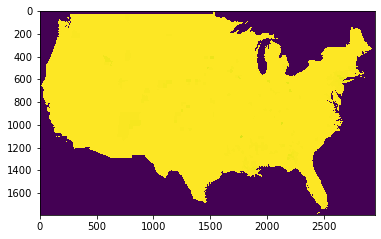

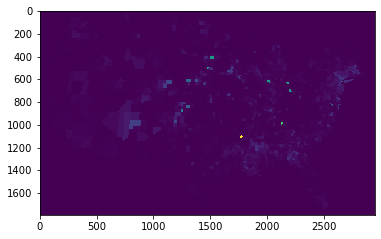

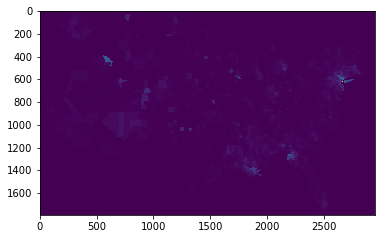

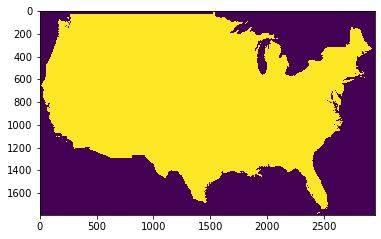

In [7]:
for i in range(6):
    plt.figure(i)
    plt.imshow(data[:, :, i])